#TEXT MINING

UNRN

Especialización en ciencias de datos aplicada

Natalia Debandi

ndebandi@unrn.edu.ar

**CLASE 2**

EMBEDINGS



In [1]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip install gensim

In [3]:
import warnings
warnings.filterwarnings('ignore')

from gensim.models import Word2Vec, KeyedVectors
from gensim.test.utils import common_texts
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
# Datos de ejemplo (oraciones tokenizadas)
oraciones = [
    ["python", "es", "un", "lenguaje", "de", "programación"],
    ["java", "es", "otro", "lenguaje", "de", "programación"],
    ["las", "redes", "neuronales", "son", "modelos", "de", "aprendizaje"],
    ["la", "inteligencia", "artificial", "usa", "redes", "neuronales"],
    ["python", "y", "java", "son", "lenguajes", "populares"]
]

# Configuración del modelo
vector_size = 100  # Dimensión de los embeddings
window = 5         # Tamaño de la ventana de contexto
min_count = 1      # Frecuencia mínima de palabras
workers = 4        # Número de hilos

# Entrenamiento del modelo
model = Word2Vec(
    sentences=oraciones,
    vector_size=vector_size,
    window=window,
    min_count=min_count,
    workers=workers
)

print("Modelo Word2Vec entrenado!")

Modelo Word2Vec entrenado!


In [5]:
# Obtener el embedding de una palabra
palabra = "python"
if palabra in model.wv:
    print(f"Embedding para '{palabra}':")
    print(model.wv[palabra])
else:
    print(f"'{palabra}' no está en el vocabulario")

Embedding para 'python':
[-9.5785465e-03  8.9431154e-03  4.1650687e-03  9.2347348e-03
  6.6435025e-03  2.9247368e-03  9.8040197e-03 -4.4246409e-03
 -6.8033109e-03  4.2273807e-03  3.7290000e-03 -5.6646108e-03
  9.7047603e-03 -3.5583067e-03  9.5494064e-03  8.3472609e-04
 -6.3384566e-03 -1.9771170e-03 -7.3770545e-03 -2.9795230e-03
  1.0416972e-03  9.4826873e-03  9.3558477e-03 -6.5958775e-03
  3.4751510e-03  2.2755705e-03 -2.4893521e-03 -9.2291720e-03
  1.0271263e-03 -8.1657059e-03  6.3201892e-03 -5.8000805e-03
  5.5354391e-03  9.8337233e-03 -1.6000033e-04  4.5284927e-03
 -1.8094003e-03  7.3607611e-03  3.9400971e-03 -9.0103243e-03
 -2.3985039e-03  3.6287690e-03 -9.9568366e-05 -1.2012708e-03
 -1.0554385e-03 -1.6716016e-03  6.0495257e-04  4.1650953e-03
 -4.2527914e-03 -3.8336217e-03 -5.2816868e-05  2.6935578e-04
 -1.6880632e-04 -4.7855065e-03  4.3134023e-03 -2.1719194e-03
  2.1035396e-03  6.6652300e-04  5.9696771e-03 -6.8423809e-03
 -6.8157101e-03 -4.4762576e-03  9.4358288e-03 -1.5918827e-03

In [8]:
# Obtener el embedding de una palabra
palabra = "neurona"
if palabra in model.wv:
    print(f"Embedding para '{palabra}':")
    print(model.wv[palabra])
else:
    print(f"'{palabra}' no está en el vocabulario")

'neurona' no está en el vocabulario


In [9]:
# Palabras más similares
palabra = "python"
similares = model.wv.most_similar(palabra, topn=3)
print(f"Palabras más similares a '{palabra}':")
for palabra, similitud in similares:
    print(f"{palabra}: {similitud:.3f}")

Palabras más similares a 'python':
son: 0.199
y: 0.097
es: 0.075


In [10]:
# Similitud entre dos palabras
palabra1 = "python"
palabra2 = "java"
if palabra1 in model.wv and palabra2 in model.wv:
    similitud = model.wv.similarity(palabra1, palabra2)
    print(f"Similitud entre '{palabra1}' y '{palabra2}': {similitud:.3f}")
else:
    print("Una o ambas palabras no están en el vocabulario")

Similitud entre 'python' y 'java': 0.009


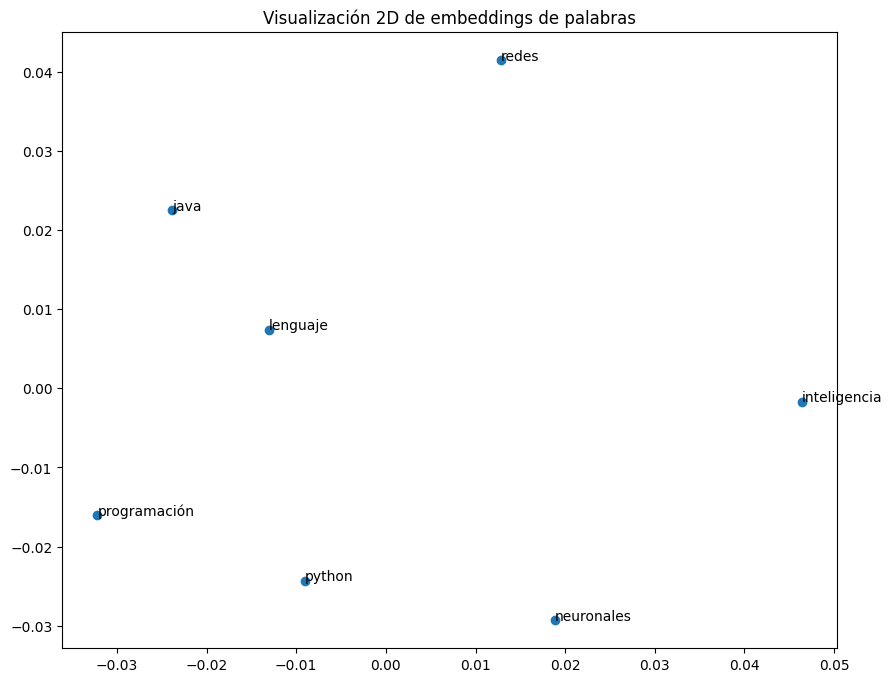

In [11]:
# Función para visualizar embeddings
def visualizar_embeddings(modelo, palabras):
    # Obtener los vectores para las palabras seleccionadas
    vectores = np.array([modelo.wv[palabra] for palabra in palabras if palabra in modelo.wv])
    palabras_filtradas = [palabra for palabra in palabras if palabra in modelo.wv]

    # Reducir dimensionalidad con PCA
    pca = PCA(n_components=2)
    vectores_2d = pca.fit_transform(vectores)

    # Crear gráfico
    plt.figure(figsize=(10, 8))
    plt.scatter(vectores_2d[:, 0], vectores_2d[:, 1])

    # Añadir etiquetas
    for i, palabra in enumerate(palabras_filtradas):
        plt.annotate(palabra, xy=(vectores_2d[i, 0], vectores_2d[i, 1]))

    plt.title("Visualización 2D de embeddings de palabras")
    plt.show()

# Palabras a visualizar
palabras_visualizar = ["python", "java", "lenguaje", "programación", "redes", "neuronales", "inteligencia"]

visualizar_embeddings(model, palabras_visualizar)

In [12]:
# usamos gesim con un modelo pequeño, hay modelos mucho mas grandes

# Descargar modelo de prueba
import gensim.downloader as api
modelo_preentrenado = api.load('word2vec-google-news-300')

# Ejemplo con el modelo pre-entrenado
palabra = "king"
print(f"\nEmbedding para '{palabra}' (modelo pre-entrenado):")
print(modelo_preentrenado[palabra][:20], "...")  # Mostramos solo los primeros 20 valores

# Analogía clásica: rey - hombre + mujer = reina
analogia = modelo_preentrenado.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print("\nAnalogía: rey - hombre + mujer =", analogia[0][0])

[==================================================] 100.0% 1662.8/1662.8MB downloaded

Embedding para 'king' (modelo pre-entrenado):
[ 0.12597656  0.02978516  0.00860596  0.13964844 -0.02563477 -0.03613281
  0.11181641 -0.19824219  0.05126953  0.36328125 -0.2421875  -0.30273438
 -0.17773438 -0.02490234 -0.16796875 -0.16992188  0.03466797  0.00521851
  0.04638672  0.12890625] ...

Analogía: rey - hombre + mujer = queen


In [13]:
# Suma y resta de vectores
def analogia_vectorial(modelo, positivo, negativo, topn=5):
    resultado = modelo.most_similar(positive=positivo, negative=negativo, topn=topn)
    print(f"{' + '.join(positivo)} - {' - '.join(negativo)}:")
    for palabra, similitud in resultado:
        print(f"{palabra}: {similitud:.3f}")



In [14]:
# Ejemplo 1
analogia_vectorial(modelo_preentrenado, ['king', 'woman'], ['man'])

king + woman - man:
queen: 0.712
monarch: 0.619
princess: 0.590
crown_prince: 0.550
prince: 0.538


In [15]:
# Ejemplo 2
analogia_vectorial(modelo_preentrenado, ['france', 'rome'], ['italy'])

france + rome - italy:
paris: 0.477
charles: 0.474
albert: 0.468
alors: 0.465
georgia: 0.465


In [18]:
# Ejemplo 3
analogia_vectorial(modelo_preentrenado, ['dog', 'kitten'], ['cat'])

dog + kitten - cat:
puppy: 0.770
pup: 0.686
pit_bull: 0.678
dogs: 0.677
Rottweiler: 0.665


In [19]:
# Guardar modelo
ruta_modelo = "mi_modelo_word2vec.model"
model.save(ruta_modelo)
print(f"Modelo guardado en {ruta_modelo}")

# Cargar modelo
modelo_cargado = Word2Vec.load(ruta_modelo)
print("Modelo cargado correctamente!")

Modelo guardado en mi_modelo_word2vec.model
Modelo cargado correctamente!


In [32]:
# Función corregida para trabajar con ambos tipos de modelos (Word2Vec y KeyedVectors)
def buscar_similares(modelo, palabra_consulta, topn=5):
    # Determinar si es un modelo Word2Vec completo o solo KeyedVectors
    if isinstance(modelo, Word2Vec):
        vectors = modelo.wv
    else:
        vectors = modelo

    if palabra_consulta in vectors:
        similares = vectors.most_similar(palabra_consulta, topn=topn)
        print(f"Palabras similares a '{palabra_consulta}':")
        for palabra, similitud in similares:
            print(f"- {palabra} (similitud: {similitud:.3f})")
    else:
        print(f"La palabra '{palabra_consulta}' no está en el vocabulario")



In [33]:
# Ejemplo con nuestro modelo pequeño
buscar_similares(model, "python")



Palabras similares a 'python':
- son (similitud: 0.199)
- y (similitud: 0.097)
- es (similitud: 0.075)
- programación (similitud: 0.061)
- modelos (similitud: 0.045)


In [34]:
# Ejemplo con modelo pre-entrenado (si está disponible)
buscar_similares(modelo_preentrenado, "python")

Palabras similares a 'python':
- pythons (similitud: 0.669)
- Burmese_python (similitud: 0.668)
- snake (similitud: 0.661)
- crocodile (similitud: 0.659)
- boa_constrictor (similitud: 0.644)
